In [29]:
import spacy
import numpy as np
from collections import namedtuple
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [3]:
model = 'en_core_web_lg'
nlp = spacy.load(model)

In [4]:
SENTENCES = ['my house is situated in',
             'lives in',
             'is from',
             'comes from',
             'happened in',
             'was taking place at',
             'was born on',
             ', age 23']

In [8]:
RelationType = namedtuple('RelationType', ['type', 'description_words'])
RELATION_TYPES = [RelationType('LIVES IN', ['house', 'lives', 'resident']),
                  RelationType('BIRTHDATE', ['born', 'birthdate']),
                  RelationType('WHEN', ['happened', 'time', 'when']),
                  RelationType('WHERE', ['happened', 'place', 'where'])]
relation_docs = [nlp(' '.join(description_words)) for _, description_words in RELATION_TYPES]

In [14]:
def is_relation_type(doc):
    similarities = []
    non_stop_doc = nlp(' '.join([token.text for token in doc if not token.text in STOP_WORDS]))
    for relation_doc in relation_docs:
        similarities.append(non_stop_doc.similarity(relation_doc))
    return RELATION_TYPES[np.argmax(similarities)].type
        

In [33]:
sentence_docs = []
for sentence in SENTENCES:
    doc = nlp(sentence)
    sentence_docs.append(doc)
    print(str(doc) + ': ' + is_relation_type(doc))

my house is situated in: LIVES IN
lives in: LIVES IN
is from: LIVES IN
comes from: WHEN
happened in: WHEN
was taking place at: WHERE
was born on: BIRTHDATE
, age 23: BIRTHDATE
: LIVES IN


In [39]:
relation_vectors = [doc.vector for doc in relation_docs]
sentence_vectors = [doc.vector for doc in sentence_docs]
relation_labels = [relation_type for relation_type, _ in RELATION_TYPES]
sentence_labels = SENTENCES
labels = relation_labels + sentence_labels

In [35]:
lsa = TruncatedSVD(n_components=2)
lsa_out = lsa.fit_transform(relation_vectors + sentence_vectors)

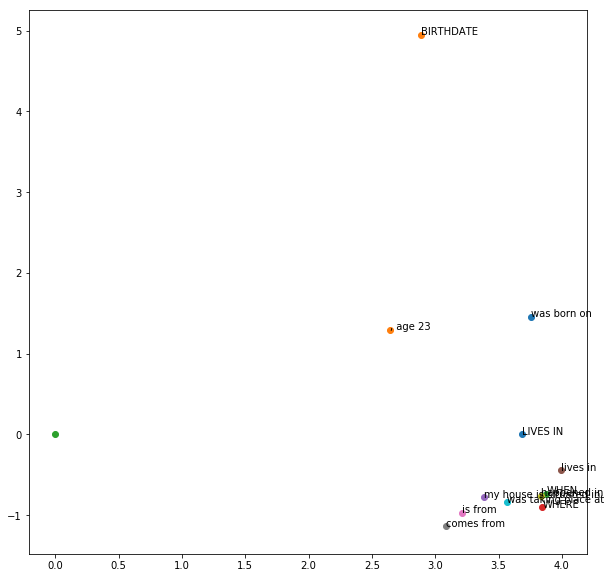

In [44]:
xs, ys = lsa_out[:,0], lsa_out[:,1]
plt.figure(figsize=[10,10])
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(labels[i], (xs[i], ys[i]))